# 소프트맥스 회귀

## 다항분유(다중 클래스 분류)의 이해

### 1) 다항 분윤

  - 이진 분류: 두 개의 선택지 중 하나를 고르는 문제
  - 다항 분류: 세 개 이상의 선택지 중 하나를 고르는 문제

### 2) 소프트맥스 함수

  - 다항 분류 활성화 함수
  - 뉴런의 출력값에 대하여 Class 분류를 위하여 마지막 단계에서 출력값에 대한 정규화를 해주는 함수.
  - 결과물의 수치의 합은 언제나 1.0이다.
  - 소프트맥스 함수의 출력값은 확률로 해석할 수 있다.

  > 사진 속 인물이 지금 슬픈 표정인지, 웃는 표정인지, 화난 표정인지 확률적으로 수치화한다고 했을 때, 슬픔(11%), 웃음(29%), 화남(60%)과 같이 확률적 분류를 할 때 용이

  ![softmax](res/softmax.png)

  - exp(x)는 지수함수(Exponential Function)이다.(e는 자연상수).
  - n은 출력층의 뉴런 수, yk는 그 중 k번재 출력을 뜻한다.

## # 01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

## # 02. 데이터셋 준비하기

  - Iris(붓꽃)의 꽆잎에 대한 각 부분의 너비와 길이 등을 측정한 데이터이며 150개의 레코드로 구성.

  - 꽃받침의 길이, 너비, 꽆잎의 길이, 너비 등을 토대로 3가지로 나뉘는 붓꽃의 종류를 분류하는 학습 모델을 구성할 수 있다.

In [2]:
origin = read_excel("https://data.hossam.kr/F03/iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## # 03. 데이터 전처리

#### 결측치 확인

In [3]:
origin.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

#### 종속변수 라벨링을 위해 값의 종류 확인

In [4]:
uni = origin['Species'].unique()
print(uni)

['setosa' 'versicolor' 'virginica']


#### 종속변수 라벨링

In [7]:
origin['Species'] = origin['Species'].astype('category').cat.rename_categories({'setosa' : 0, 'virginica' : 1, 'versicolor' : 2})
origin['Species'].value_counts()

Species
0    50
2    50
1    50
Name: count, dtype: int64

## # 04. 탐색적 데이터 분석

#### 기본통계 확인

In [8]:
origin.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 산점도 행렬 확인

> 종속변수로 `hue`를 적용했을 때 뚜렷한 군집을 나타내는지 확인하기 위함

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


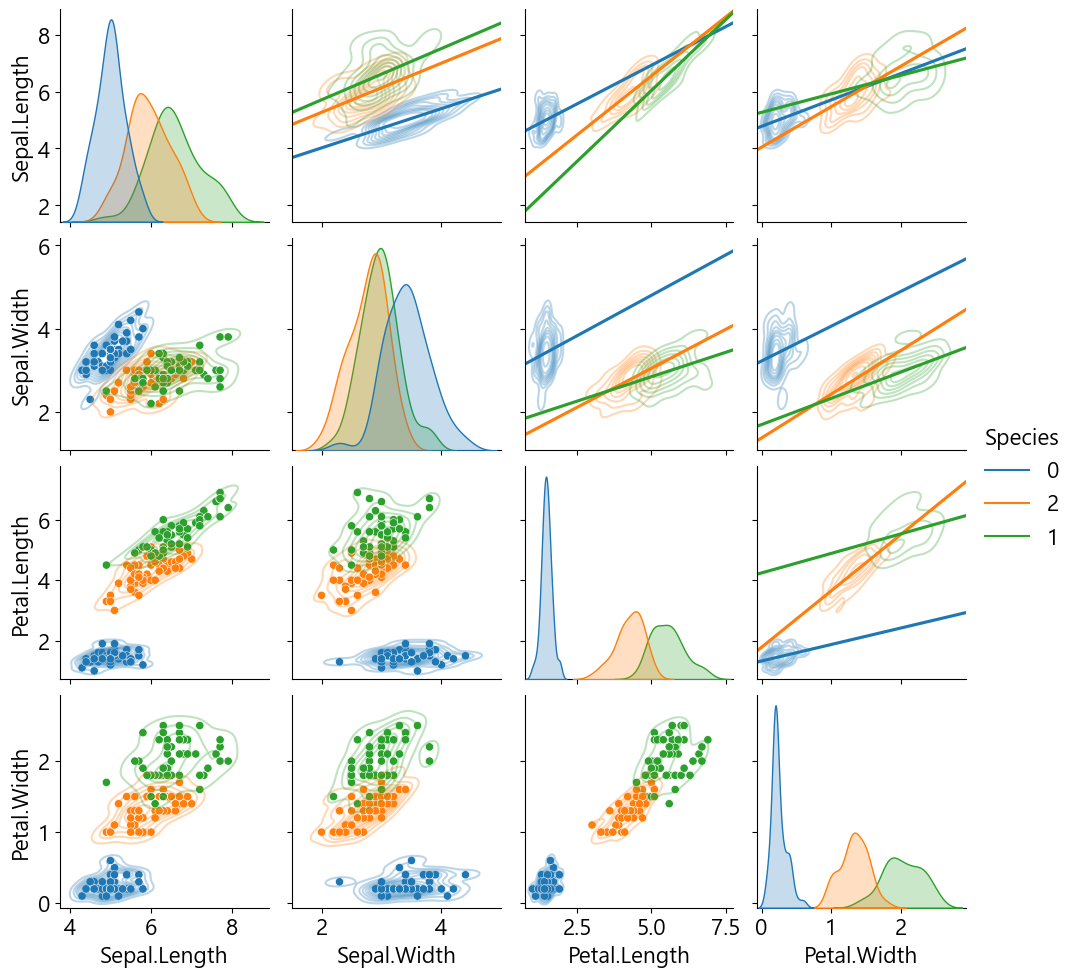

In [9]:
ax = sb.pairplot(origin, hue="Species", kind="kde", plot_kws={"alpha":0.3})
ax.map_lower(sb.scatterplot)
ax.map_upper(sb.regplot, scatter=False, truncate=False, ci=False)
plt.show()
plt.close()

## # 05. 데이터셋 분할하기

#### 랜덤시드 고정

In [10]:
np.random.seed(777)

#### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [11]:
x = origin.drop(['Species'], axis=1)
y = origin['Species']
x.shape, y.shape

((150, 4), (150,))

### 종속변수에 대한 one-hot-encoding

통상적인 더미변수 처리.

단 계산(회귀식)을 위한 처리가 아닌 분류를 위한 처리이므로 1번째 항목을 제외해서는 안된다.

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: category
Categories (3, int64): [0, 2, 1]

In [13]:
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### 훈련 데이터와 검증 데이터로 분할

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cate, test_size=0.3, random_state=777)
print("훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s" % (x_train.shape, y_train.shape))
print("검증용 데이터셋 크기: %s, 검증용 레이블셋 크기: %s" % (x_test.shape, y_test.shape))

훈련용 데이터셋 크기: (105, 4), 훈련용 레이블셋 크기: (105, 3)
검증용 데이터셋 크기: (45, 4), 검증용 레이블셋 크기: (45, 3)


## # 06. 모델 개발

#### 모델 정의

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4, )))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 학습하기

In [16]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
4/4 [==============================] - 1s 60ms/step - loss: 1.1907 - acc: 0.3714 - val_loss: 1.1900 - val_acc: 0.2444 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 1.0913 - acc: 0.3714 - val_loss: 1.0844 - val_acc: 0.2889 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 1.0248 - acc: 0.5524 - val_loss: 1.0027 - val_acc: 0.6222 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9775 - acc: 0.6857 - val_loss: 0.9454 - val_acc: 0.6000 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9386 - acc: 0.6571 - val_loss: 0.9073 - val_acc: 0.7111 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9096 - acc: 0.6190 - val_loss: 0.8704 - val_acc: 0.7333 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8784 - acc: 0.6286 - val_loss: 0.8405 - val_acc: 0.7556 - lr: 0.0010

#### 기본적인 머신러닝 학습결과 평가

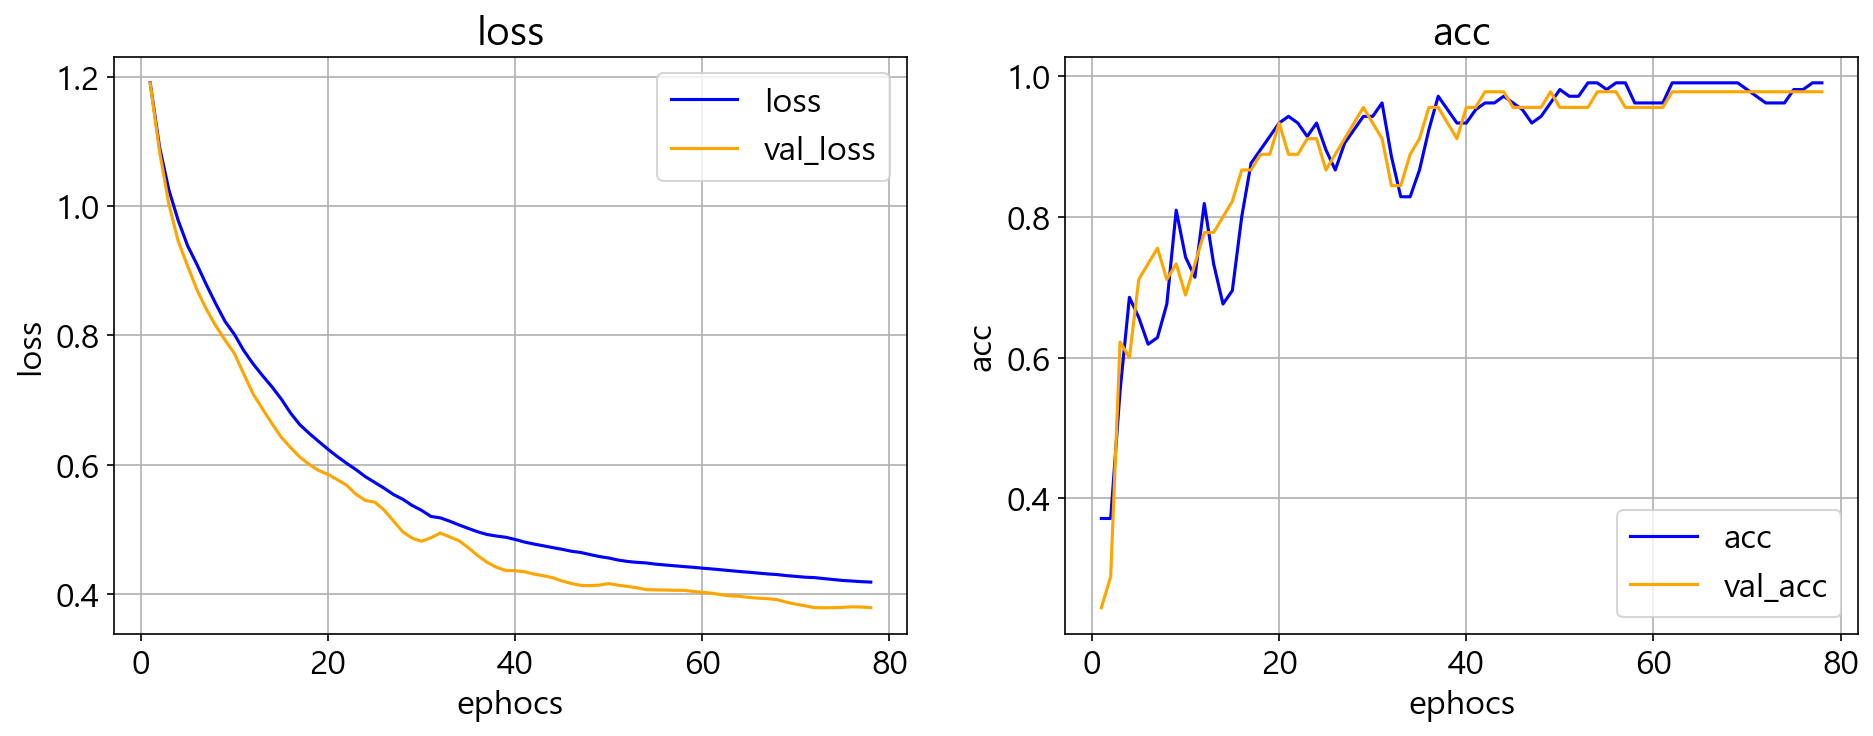

4/4 [==============================] - 0s 1ms/step - loss: 0.4180 - acc: 0.9905
최종 훈련 손실률: 0.417973, 최종 훈련 정확도: 0.990476
2/2 [==============================] - 0s 3ms/step - loss: 0.3789 - acc: 0.9778
최종 검증 손실률: 0.378851, 최종 검증 정확도: 0.977778


In [17]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

## # 08. 학습 결과 적용

#### 테스트 데이터에 대한 예측 결과 산정

In [18]:
results = model.predict(x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다." % (data_count, case_count))

print(results)

2/2 [==============================] - 0s 2ms/step
45개의 검증 데이터가 각각 3개의 경우의 수를 갖는다.
[[0.00607285 0.6085329  0.38539428]
 [0.8907841  0.01557075 0.09364517]
 [0.00582724 0.6066845  0.38748825]
 [0.00836287 0.6327532  0.35888392]
 [0.04071859 0.4314371  0.5278443 ]
 [0.93739957 0.00706773 0.05553261]
 [0.00381479 0.60051817 0.39566708]
 [0.00591148 0.6433857  0.3507028 ]
 [0.9239409  0.00838159 0.06767754]
 [0.91955316 0.00992182 0.07052495]
 [0.00527343 0.62908036 0.36564615]
 [0.0470864  0.41796613 0.53494745]
 [0.05524784 0.40075338 0.54399884]
 [0.01072597 0.5341597  0.45511433]
 [0.01115905 0.59171134 0.39712965]
 [0.01318407 0.6002114  0.38660452]
 [0.87798697 0.01721844 0.10479461]
 [0.01098689 0.5068704  0.48214263]
 [0.85370755 0.02186426 0.1244282 ]
 [0.0575759  0.40230453 0.5401196 ]
 [0.09101877 0.34858814 0.5603931 ]
 [0.03743126 0.38123637 0.5813324 ]
 [0.00248887 0.67609537 0.32141578]
 [0.8776371  0.01738302 0.10497992]
 [0.01305237 0.5386703  0.44827738]
 [0.86222106 0.02

#### 가장 큰 확률 값의 인덱스들만 별도의 리스트로 생성

In [19]:
arg_results = np.argmax(results, axis = 1)
arg_results

array([1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0], dtype=int64)

#### 결과 데이터 셋 구성

In [20]:
result_df = DataFrame({
    '실제값': np.argmax(y_test, axis = -1),
    '분류결과': arg_results
})

result_df

,실제값,분류결과
0,1,1
1,0,0
2,1,1
3,1,1
4,2,2
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


#### 컬럼에 따른 값의 종류 형태로 데이터 재배치

In [21]:
mdf = result_df.melt()
mdf.reset_index(inplace=True)
mdf

,index,variable,value
0,0,실제값,1
1,1,실제값,0
2,2,실제값,1
3,3,실제값,1
4,4,실제값,2
...,...,...,...
85,85,분류결과,0
86,86,분류결과,1
87,87,분류결과,2
88,88,분류결과,2


In [22]:
df = pivot_table(mdf, index='value', columns='variable', values='index', aggfunc='count')
df

variable,분류결과,실제값
value,,
0,17,17
1,18,17
2,10,11


In [23]:
cm = confusion_matrix(result_df['실제값'], result_df['분류결과'])
cmdf1 = DataFrame(cm, index=[['실제값', '실제값', '실제값'], [0,1,2]], 
                  columns=[['분류결과', '분류결과', '분류결과'], [0,1,2]])
cmdf1

분류결과        
         0   1   2
실제값 0   17   0   0
    1    0  17   0
    2    0   1  10